# ALY 6140 - Python and Analytics Technology

## Capstone Project - Airbnb prices in European Cities

# Introduction

Airbnb is a popular internet marketplace for short-term rental properties. It enables individuals
all around the world to rent out space for temporary housing, making it a good option for those
commuting to new places and searching for brief stays.

The dataset provides a comprehensive look at Airbnb prices in some of the most popular European cities. Each listing is evaluated for various attributes such as room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more to capture an in-depth understanding of Airbnb prices on both weekdays and weekends. This dataset can be used by individuals and companies to gain insight on the cost of Airbnb listings.

The dataset includes information such as realSum (the total price of the listing), room_type (private/shared/entire home/apt), host_is_superhost (boolean value indicating if host is a superhost or not), multi (indicator whether listing is for multiple rooms or not), biz (business indicator) , guest_satisfaction_overall (overall rating from guests camparing all listings offered by host ), bedrooms, dist (distance from city center) , lng & lat coordinates for location identification etc.

Dimensions of the dataset:
The data we have taken is of the Airbnb prices for European cities. It has 20 datasets involving weekday and weekend pricing for 10 European countries that are combined into a single data frame. The dimensions of the combined data frame are 51707 rows x 20 columns. The categories involved are such as listed accommodations' features, neighborhood summary, location, host type and numerical factors cleanliness rating, pricing, number of bedrooms, latitude, longitude etc.

Goal:
We expect to analyze and visualize the preferences of customers regarding various factors, and spatial trends in Airbnb prices across Europe and if there is a relation between the price and spatial position (distance from the city centre), find the most favorable cities for hosting, compare differences between weekday vs. weekend booking patterns to project rental rates and find important determinants of Airbnb prices.

Questions:
We expect to investigate the room prices per the type and the city, differences in weekday and weekend pricing, the relation between the neighborhood and room availability.

In [1]:
#importing all the necessary packages and libraries to perform the EDA and build models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error,mean_absolute_percentage_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

sns.set_style('darkgrid')
sns.set_palette('bright')

In [2]:
#To import dataset from Kaggle

!pip install kaggle

In [3]:
#https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities
#Login to kaggle and copy the API command with the 'Copy API Command' option by clicking the kebab menu icon
#If this doesn't work, click on your profile icon, go to the settings and click on 'Create new token' under the API and run the command again

!kaggle datasets download -d thedevastator/airbnb-prices-in-european-cities

airbnb-prices-in-european-cities.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#extractall should be used with a folder where the zip file should be extracted

import zipfile

with zipfile.ZipFile('airbnb-prices-in-european-cities.zip', 'r') as zip_ref:
    zip_ref.extractall('ALY6140-Capstone')

In [5]:
#reading all the csv files to dataframes

amsterdam_weekdays = pd.read_csv('ALY6140-Capstone/amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('ALY6140-Capstone/amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('ALY6140-Capstone/athens_weekdays.csv')
athens_weekends = pd.read_csv('ALY6140-Capstone/athens_weekends.csv')
barcelona_weekdays = pd.read_csv('ALY6140-Capstone/barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('ALY6140-Capstone/barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('ALY6140-Capstone/berlin_weekdays.csv')
berlin_weekends = pd.read_csv('ALY6140-Capstone/berlin_weekends.csv')
budapest_weekdays = pd.read_csv('ALY6140-Capstone/budapest_weekdays.csv')
budapest_weekends = pd.read_csv('ALY6140-Capstone/budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('ALY6140-Capstone/lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('ALY6140-Capstone/lisbon_weekends.csv')
london_weekdays = pd.read_csv('ALY6140-Capstone/london_weekdays.csv')
london_weekends = pd.read_csv('ALY6140-Capstone/london_weekends.csv')
paris_weekdays = pd.read_csv('ALY6140-Capstone/paris_weekdays.csv')
paris_weekends = pd.read_csv('ALY6140-Capstone/paris_weekends.csv')
rome_weekdays = pd.read_csv('ALY6140-Capstone/rome_weekdays.csv')
rome_weekends = pd.read_csv('ALY6140-Capstone/rome_weekends.csv')
vienna_weekdays = pd.read_csv('ALY6140-Capstone/vienna_weekdays.csv')
vienna_weekends = pd.read_csv('ALY6140-Capstone/vienna_weekends.csv')

In [6]:
#The shape of the individual imported data files that the number of features in each file is the same, but the number of entries is different.
#All datasets have the same number of features, thus they can be combined on top of each other to turn all of these separate datasets into a big single dataset.


In [7]:
import sys
sys.path.append('C:/Users/sreek/Downloads')  # Replace '/path/to/example' with the actual path to your module


In [8]:
from capstone_Group2 import combine, model_result, bar_plot

In [9]:
#Combining the dataframes by city with their weekday and weekend to a single dataframe

amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

In [10]:
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]
city_names = [city.city.unique()[0].capitalize() for city in cities]
df = pd.concat(cities, ignore_index=True)
df.drop(columns = ['Unnamed: 0'], inplace=True)
df = df.rename(columns={'realSum': 'Price','biz':'BusinessClass', 'multi':'MultipleRooms','cleanliness_rating':'Cleanliness rating','guest_satisfaction_overall':'Overall guest satisfaction','person_capacity':'Room Capacity','dist':'Distance from center','metro_dist':'Distance from metro station','week_time':'Weekday/Weekend'})

In [11]:
df.head()

,Price,room_type,room_shared,room_private,Room Capacity,host_is_superhost,MultipleRooms,BusinessClass,Cleanliness rating,Overall guest satisfaction,...,Distance from center,Distance from metro station,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,Weekday/Weekend,city
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        51707 non-null  float64
 1   room_type                    51707 non-null  object 
 2   room_shared                  51707 non-null  bool   
 3   room_private                 51707 non-null  bool   
 4   Room Capacity                51707 non-null  float64
 5   host_is_superhost            51707 non-null  bool   
 6   MultipleRooms                51707 non-null  int64  
 7   BusinessClass                51707 non-null  int64  
 8   Cleanliness rating           51707 non-null  float64
 9   Overall guest satisfaction   51707 non-null  float64
 10  bedrooms                     51707 non-null  int64  
 11  Distance from center         51707 non-null  float64
 12  Distance from metro station  51707 non-null  float64
 13  attr_index      

In [13]:
df.describe()

,Price,Room Capacity,MultipleRooms,BusinessClass,Cleanliness rating,Overall guest satisfaction,bedrooms,Distance from center,Distance from metro station,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [14]:
df.isna().sum()

Price                          0
room_type                      0
room_shared                    0
room_private                   0
Room Capacity                  0
host_is_superhost              0
MultipleRooms                  0
BusinessClass                  0
Cleanliness rating             0
Overall guest satisfaction     0
bedrooms                       0
Distance from center           0
Distance from metro station    0
attr_index                     0
attr_index_norm                0
rest_index                     0
rest_index_norm                0
lng                            0
lat                            0
Weekday/Weekend                0
city                           0
dtype: int64

In [15]:
#Making business and multiple room indicating columns and boolean values since they're only true and false values. 

df['BusinessClass']=df.BusinessClass.astype('bool')
df['MultipleRooms']=df.MultipleRooms.astype('bool')
df.dtypes

Price                          float64
room_type                       object
room_shared                       bool
room_private                      bool
Room Capacity                  float64
host_is_superhost                 bool
MultipleRooms                     bool
BusinessClass                     bool
Cleanliness rating             float64
Overall guest satisfaction     float64
bedrooms                         int64
Distance from center           float64
Distance from metro station    float64
attr_index                     float64
attr_index_norm                float64
rest_index                     float64
rest_index_norm                float64
lng                            float64
lat                            float64
Weekday/Weekend                 object
city                            object
dtype: object

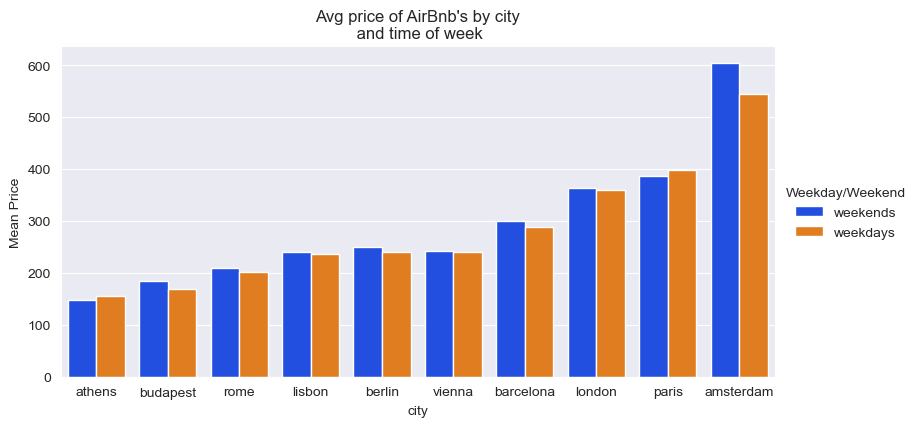

<Figure size 640x480 with 0 Axes>

In [16]:
#side by side bar of the average weekday vs weekend price

meanprices=df.groupby(['city','Weekday/Weekend']).Price.mean().reset_index().sort_values(by=['Price'])
meanprices=meanprices.rename(columns={'Price':'Mean Price'})

sns.catplot(x='city',y='Mean Price',hue='Weekday/Weekend',data=meanprices,
           height=4, aspect=2,kind='bar')
plt.title('Avg price of AirBnb\'s by city\n and time of week')
plt.show()
plt.clf()

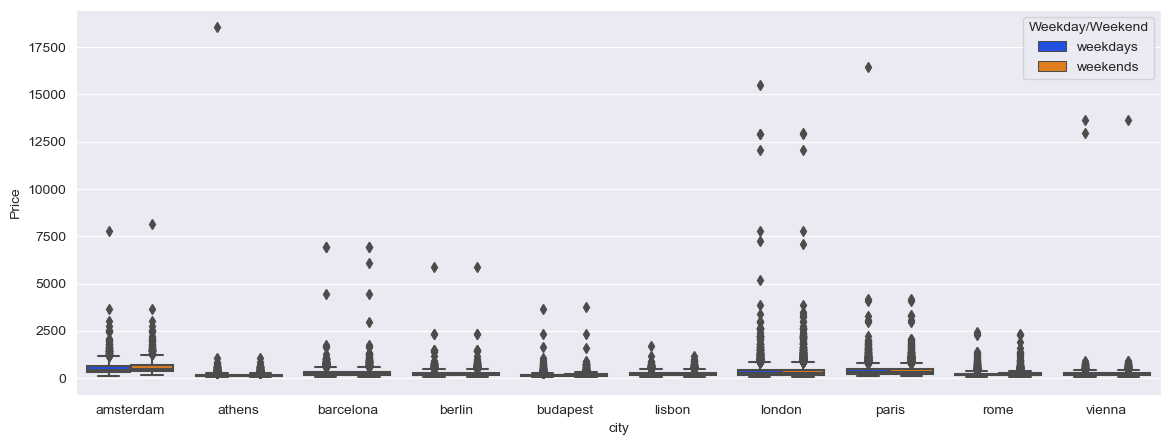

In [17]:
#Boxplot of the weekday and weekend prices in cities

plt.figure(figsize=(14,5))
sns.boxplot(x='city',y='Price',data=df,hue='Weekday/Weekend')
plt.show()

In [18]:
#Since the above boxplot has outliers

df1 = df[df.Price < 1000]

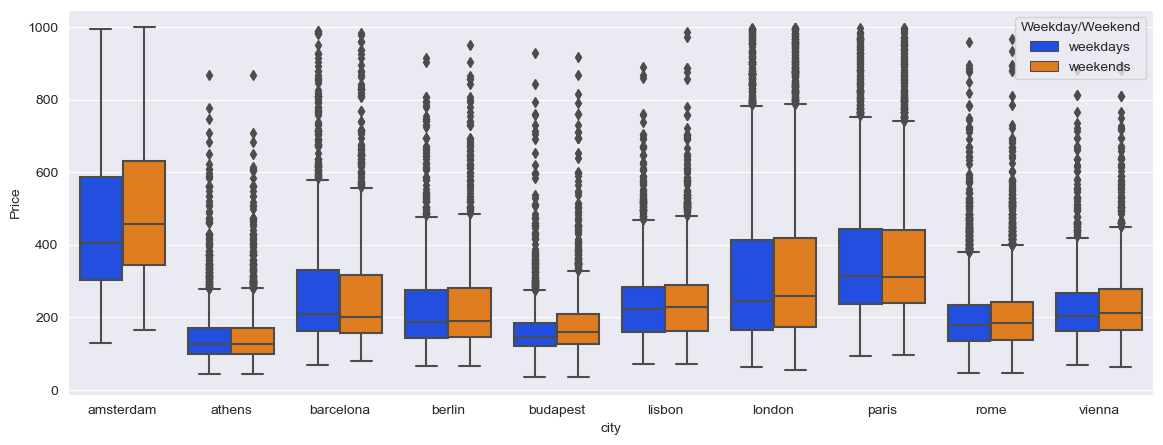

In [19]:
#Boxplot of weekday and weekend prices in cities after clearing outliers

plt.figure(figsize=(14,5))
sns.boxplot(x='city',y='Price',data=df1,hue='Weekday/Weekend')
plt.show()

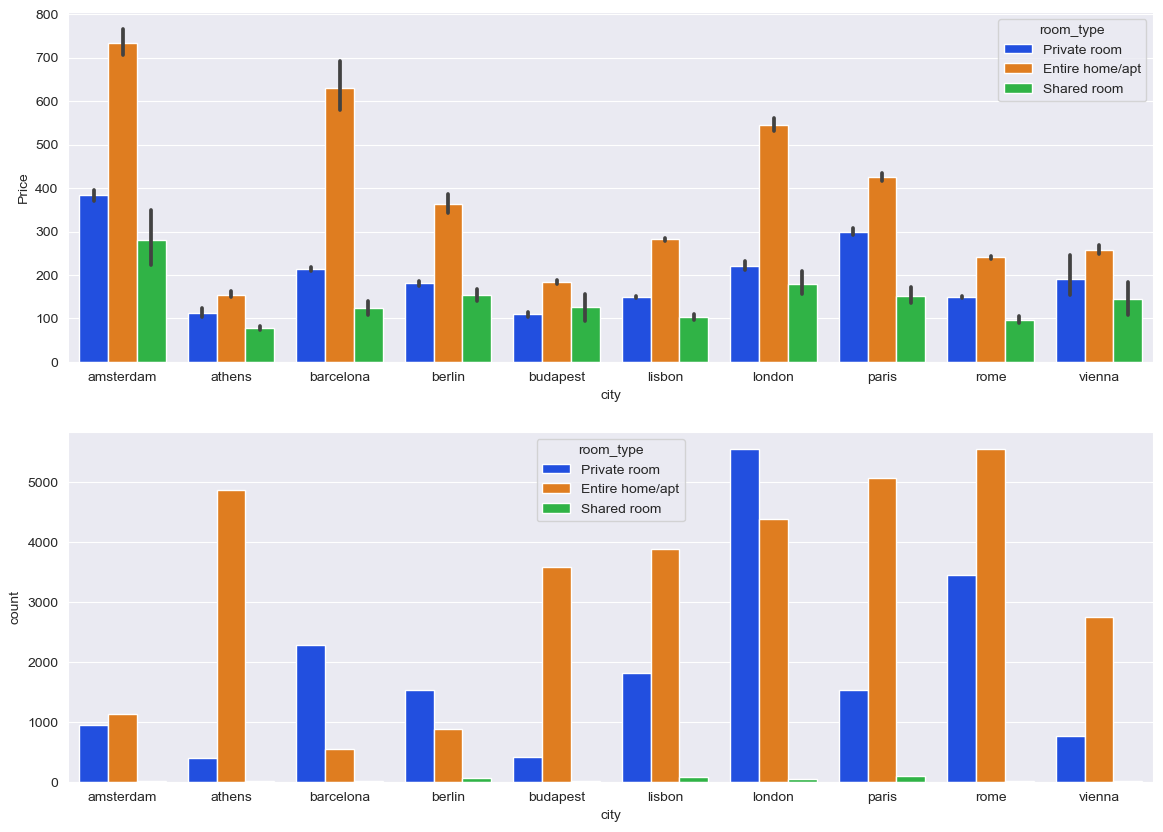

In [20]:
#Plots of the prices of different types of rooms with the cities and the count of the different types of rooms with the cities

fig, ax = plt.subplots(2,1,figsize=(14,10))
sns.countplot(x='city',data=df, hue='room_type',ax=ax[1])
sns.barplot(x='city',y='Price',data=df, hue='room_type',ax=ax[0])
plt.show()

Text(0.5, 1.0, 'Distribution between the price and the metro distance')

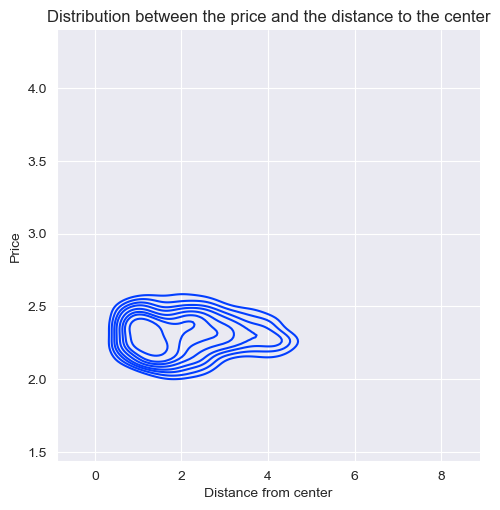

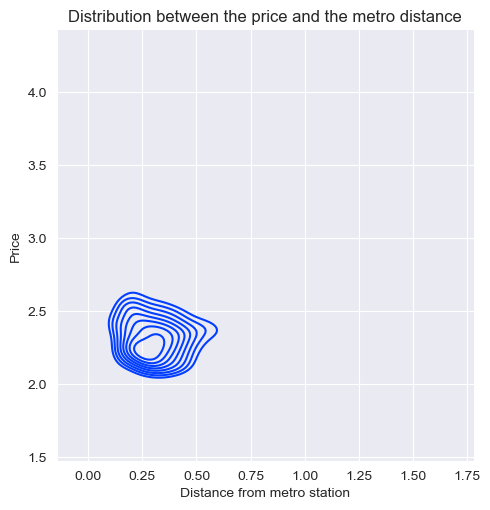

In [21]:
#KDE (Kernel Density Estimate) for the distribution between Price and distance to the center, price and the metro distance
#Using logscale to clean the outliers

log_df = df.copy(deep=True)
log_df['Price'] = log_df['Price'].apply(lambda x : np.log10(x))
sns.displot(
    data = log_df[log_df['Distance from center']<8], y = 'Price', x = 'Distance from center',
    bins = 100,
    kind = 'kde',
    levels = 9,thresh = 0.5
)
plt.title('Distribution between the price and the distance to the center')

sns.displot(
    data = log_df[log_df['Distance from center']<1.5], y = 'Price', x = 'Distance from metro station', 
        bins = 70,
    kind='kde',levels = 9,thresh = 0.5
)
plt.title('Distribution between the price and the metro distance')

In [22]:
#High probability of finding rooms at 4.5 km from center and 1 km from metro

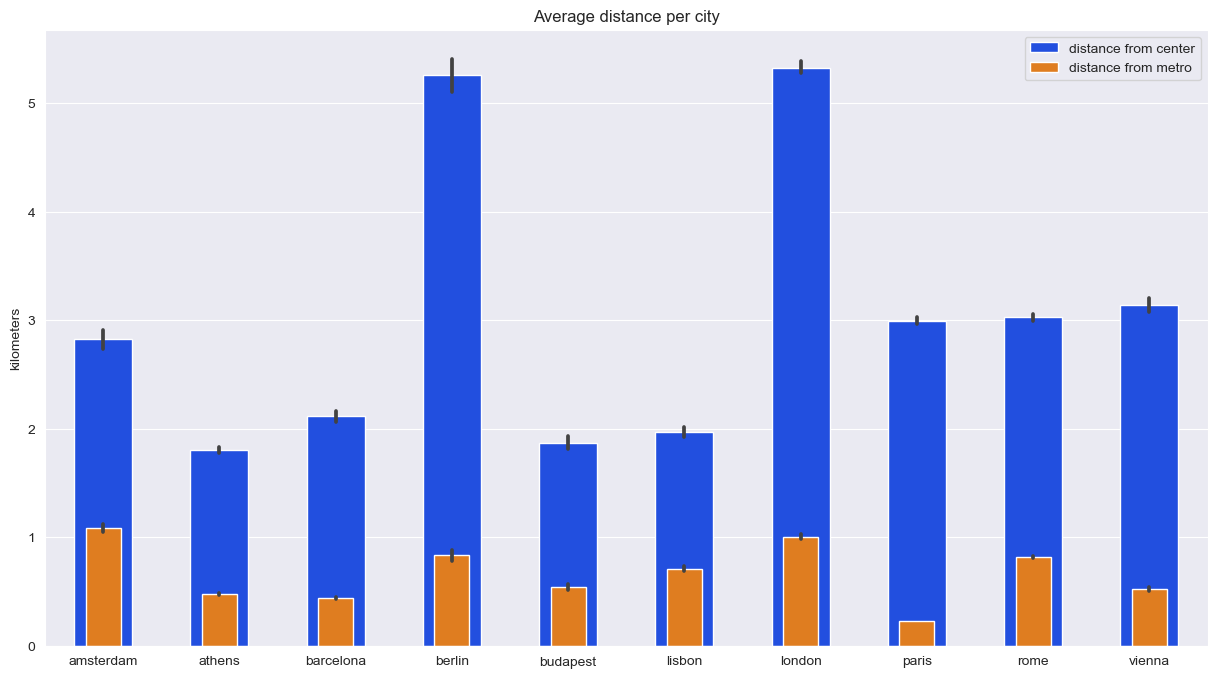

In [23]:
#This plot represents the difference between the average distance from the listing to the city center and the average distance from the listing to the nearest metro station

plt.figure(figsize=(15,8))
sns.barplot(data=df, x="city", y="Distance from center", width=0.5, color='C0', label='distance from center')
sns.barplot(data=df, x="city", y="Distance from metro station", width=0.3, color='C1', label='distance from metro')
plt.ylabel('kilometers')
plt.xlabel(None)
plt.title('Average distance per city')
plt.legend()
plt.show()

In [24]:
#Replacing the False values with 0 and True values with 1 to make it easier to work with the data

df.replace({False: 0, True: 1},inplace=True)
df.head()

,Price,room_type,room_shared,room_private,Room Capacity,host_is_superhost,MultipleRooms,BusinessClass,Cleanliness rating,Overall guest satisfaction,...,Distance from center,Distance from metro station,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,Weekday/Weekend,city
0,194.033698,Private room,0,1,2.0,0,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,0,1,4.0,0,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,0,1,2.0,0,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,0,1,4.0,0,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,0,1,2.0,1,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam


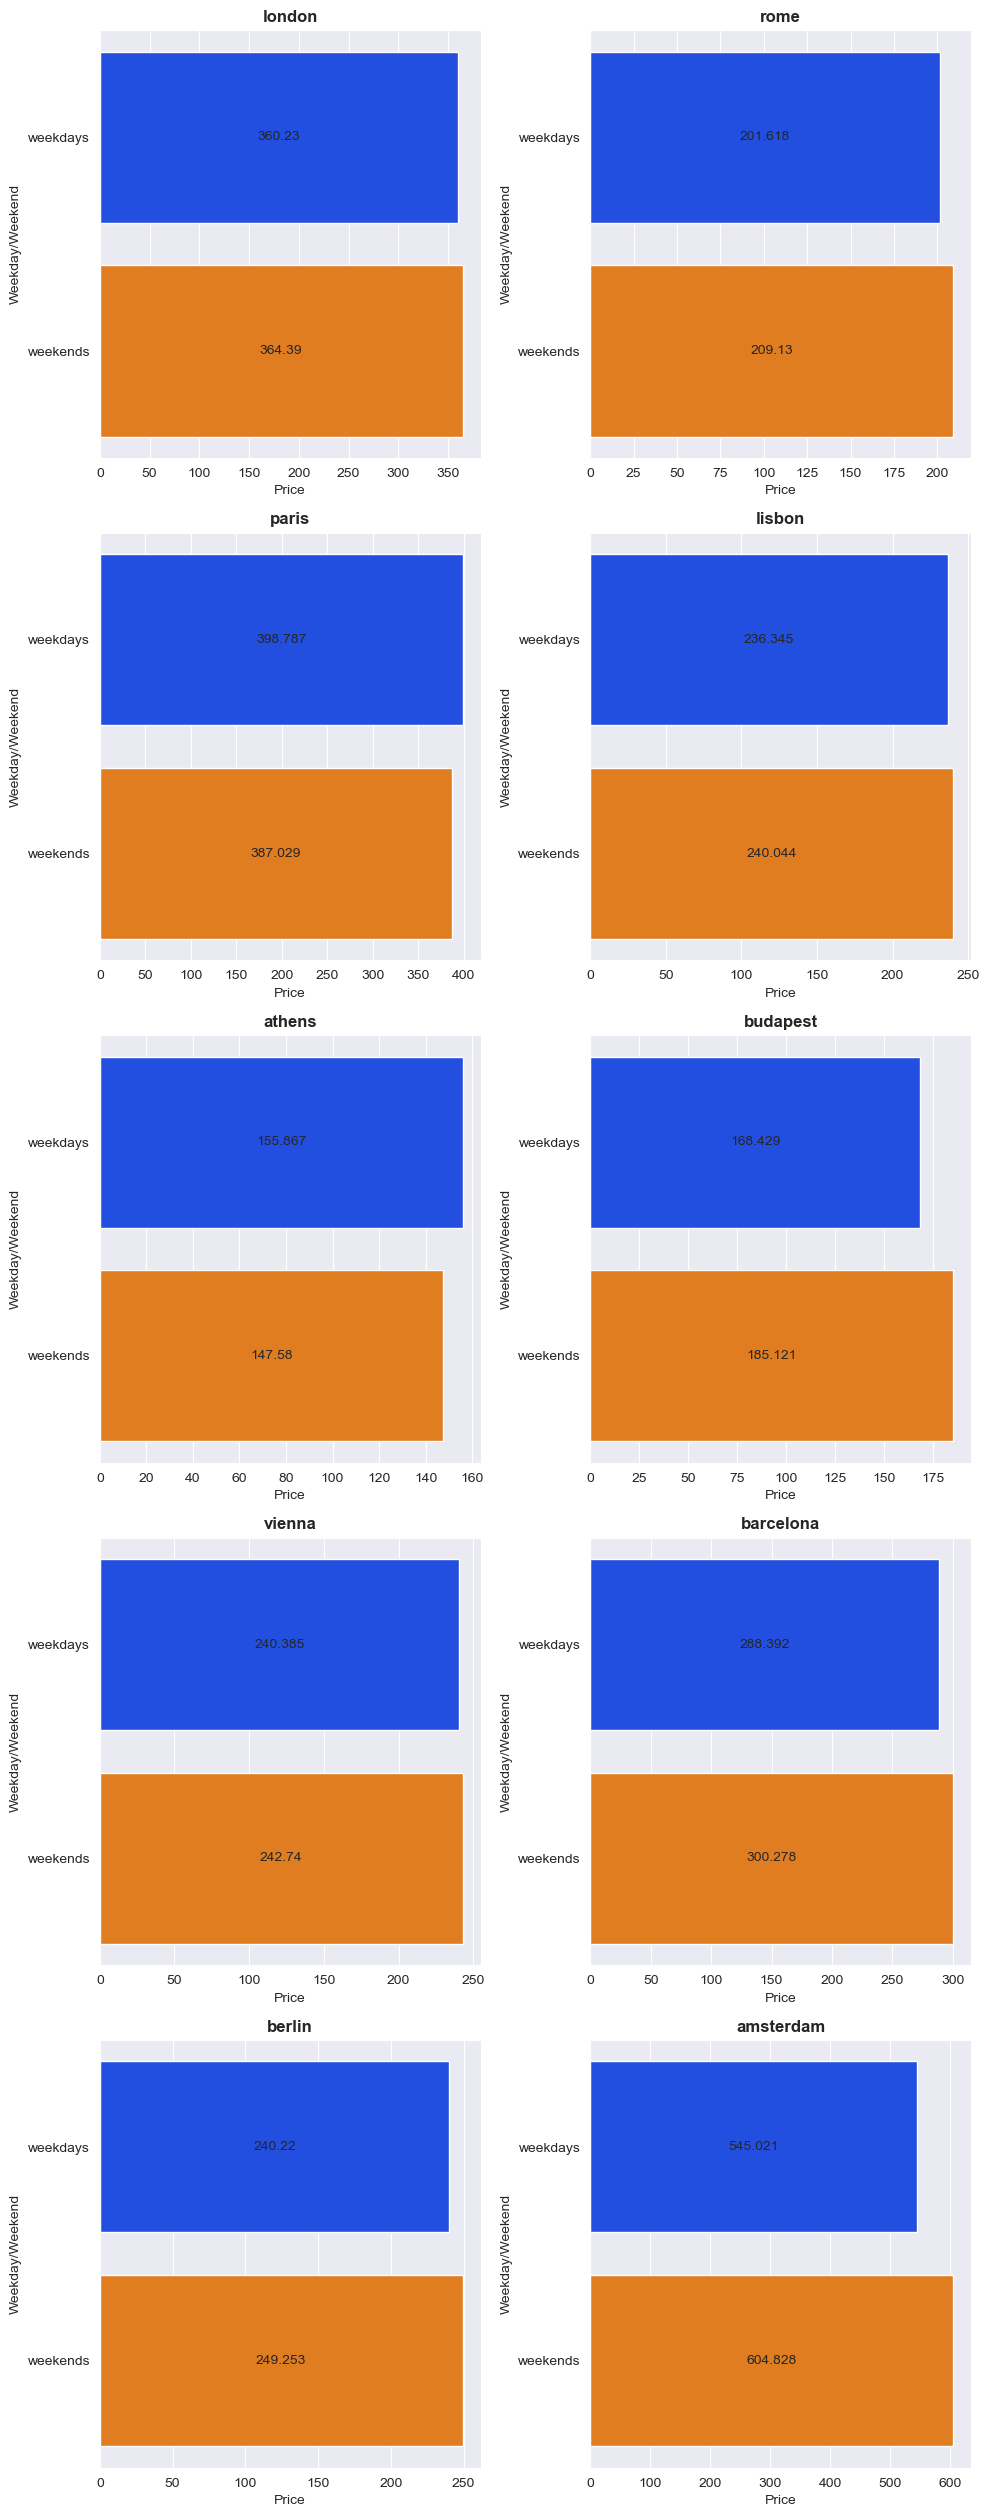

In [25]:
#A bar plot of the weekday and weekend pricing by the city separately

bar_plot(df,'city','Price','Weekday/Weekend')

In [26]:
europe_categorical_dummies = pd.get_dummies(df[['room_type','Weekday/Weekend','city']],drop_first=True)
europe_data = pd.concat([europe_categorical_dummies, df.drop(columns=['room_type','Weekday/Weekend', 'city'])], axis=1)

In [27]:
europe_data.head()

,room_type_Private room,room_type_Shared room,Weekday/Weekend_weekends,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,...,Overall guest satisfaction,bedrooms,Distance from center,Distance from metro station,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,1,0,0,0,0,0,0,0,0,0,...,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,0,0,0,0,0,0,0,0,0,...,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,1,0,0,0,0,0,0,0,0,0,...,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,1,0,0,0,0,0,0,0,0,0,...,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,1,0,0,0,0,0,0,0,0,0,...,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [28]:
europe_data.drop(columns = ['rest_index_norm','attr_index_norm','room_shared','room_private'],inplace=True)

In [29]:
Standard_Scaler = StandardScaler()

In [30]:
#Standard scaler for normalizing the data and removing the mean + dividing by standard deviation

In [31]:
features_to_scale = ['Room Capacity','Cleanliness rating','Overall guest satisfaction','bedrooms','Distance from center','Distance from metro station','attr_index','rest_index']
features_not_to_scale = ['room_type_Private room', 'room_type_Shared room', 'Weekday/Weekend_weekends','city_athens', 
                         'city_barcelona', 'city_berlin', 'city_budapest','city_lisbon', 'city_london', 'city_paris', 
                         'city_rome', 'city_vienna','Price','host_is_superhost', 'MultipleRooms', 'BusinessClass',]

In [32]:
#Feature scaled for better accuracy so that values are rescaled between range of 0 to 1

In [33]:
scaled_features = pd.DataFrame(Standard_Scaler.fit_transform(europe_data[features_to_scale]), columns=features_to_scale)


In [34]:
scaled_features.head()

,Room Capacity,Cleanliness rating,Overall guest satisfaction,bedrooms,Distance from center,Distance from metro station,attr_index,rest_index
0,-0.894595,0.638184,0.041559,-0.253043,0.765183,2.165278,-0.958896,-1.061632
1,0.645605,-1.456366,-0.852751,-0.253043,-1.129133,-0.515301,1.499307,0.422610
2,-0.894595,-0.409091,-0.629173,-0.253043,1.068196,3.461575,-0.974088,-1.067390
3,0.645605,-0.409091,-0.293807,1.340826,-1.172382,-0.281655,0.885725,0.498431
4,-0.894595,0.638184,0.600503,-0.253043,-1.105593,-0.422892,1.150718,0.378476


In [35]:
europe_data_final = pd.concat([scaled_features.reset_index(drop=True),  europe_data[features_not_to_scale].reset_index(drop=True)], axis=1)
europe_data_final.head()

,Room Capacity,Cleanliness rating,Overall guest satisfaction,bedrooms,Distance from center,Distance from metro station,attr_index,rest_index,room_type_Private room,room_type_Shared room,...,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,Price,host_is_superhost,MultipleRooms,BusinessClass
0,-0.894595,0.638184,0.041559,-0.253043,0.765183,2.165278,-0.958896,-1.061632,1,0,...,0,0,0,0,0,0,194.033698,0,1,0
1,0.645605,-1.456366,-0.852751,-0.253043,-1.129133,-0.515301,1.499307,0.422610,1,0,...,0,0,0,0,0,0,344.245776,0,0,0
2,-0.894595,-0.409091,-0.629173,-0.253043,1.068196,3.461575,-0.974088,-1.067390,1,0,...,0,0,0,0,0,0,264.101422,0,0,1
3,0.645605,-0.409091,-0.293807,1.340826,-1.172382,-0.281655,0.885725,0.498431,1,0,...,0,0,0,0,0,0,433.529398,0,0,1
4,-0.894595,0.638184,0.600503,-0.253043,-1.105593,-0.422892,1.150718,0.378476,1,0,...,0,0,0,0,0,0,485.552926,1,0,0


In [36]:
### Implementation of Regression Models

In [37]:
# Seperating the data into X (independent) and y (dependent) varialbles
X = europe_data_final.drop(['Price'],axis=1)
y = europe_data_final['Price']

print('Shape of X: ',X.shape)
print('Shape of y: ',y.shape)

Shape of X:  (51707, 23)
Shape of y:  (51707,)


In [38]:
#Train-Test split in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('Shape of train: ',X_train.shape)
print('Shape of test: ',X_test.shape)

Shape of train:  (36194, 23)
Shape of test:  (15513, 23)


In [39]:
# using decision tree regressor
result = pd.DataFrame(columns=['RMSE','MAE','MAPE', 'R2'])
dtr = DecisionTreeRegressor()
dtr_model1 = dtr.fit(X_train,y_train)
y_pred_dtr_model1 = dtr_model1.predict(X_test)
model_result(result, y_test,y_pred_dtr_model1,'DecisionTree')
print(result)

                RMSE    MAE  MAPE    R2
DecisionTree  240.03  56.94   0.2  0.53


In [40]:
# using Random Forest Regressor with default parameters
rfr = RandomForestRegressor()
rfr_model1 = rfr.fit(X_train,y_train)
y_pred_rfr_model1 = rfr_model1.predict(X_test)
model_result(result, y_test,y_pred_rfr_model1,'RandomForest')
print(result)

                RMSE    MAE  MAPE    R2
DecisionTree  240.03  56.94  0.20  0.53
RandomForest  254.29  59.50  0.21  0.47


In [41]:
#The root mean squared error and mean absolute error  for random forest regression are lower than decision tree model hence it is a model with better accuracy

In [42]:
europe_data_final.describe()

,Room Capacity,Cleanliness rating,Overall guest satisfaction,bedrooms,Distance from center,Distance from metro station,attr_index,rest_index,room_type_Private room,room_type_Shared room,...,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,Price,host_is_superhost,MultipleRooms,BusinessClass
count,5.170700e+04,5.170700e+04,5.170700e+04,5.170700e+04,5.170700e+04,5.170700e+04,5.170700e+04,5.170700e+04,51707.000000,51707.000000,...,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,-1.407151e-16,4.276421e-16,-4.523772e-16,7.200657e-17,-1.506092e-16,-3.078144e-17,-6.596022e-17,3.517878e-17,0.361518,0.007078,...,0.077784,0.111455,0.193262,0.129344,0.174580,0.068405,279.879591,0.255903,0.291353,0.350204
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,0.480445,0.083835,...,0.267835,0.314698,0.394861,0.335584,0.379611,0.252441,327.948386,0.436372,0.454390,0.477038
min,-8.945950e-01,-7.740014e+00,-8.119019e+00,-1.846911e+00,-1.326873e+00,-7.916402e-01,-1.241599e+00,-1.219644e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.779339,0.000000,0.000000,0.000000
25%,-8.945950e-01,-4.090908e-01,-2.938068e-01,-2.530425e-01,-7.261085e-01,-5.047238e-01,-7.003575e-01,-7.551535e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.752174,0.000000,0.000000,0.000000
50%,-1.244951e-01,6.381840e-01,2.651370e-01,-2.530425e-01,-2.413537e-01,-3.126644e-01,-2.663930e-01,-2.104854e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,211.343089,0.000000,0.000000,0.000000
75%,6.456049e-01,6.381840e-01,7.122919e-01,-2.530425e-01,4.477405e-01,6.561688e-02,4.073481e-01,4.132676e-01,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,319.694287,1.000000,1.000000,1.000000
max,2.185805e+00,6.381840e-01,8.240807e-01,1.409178e+01,9.229452e+00,1.584127e+01,1.877341e+01,1.218942e+01,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18545.450285,1.000000,1.000000,1.000000


In [43]:
#Linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

model_result(result, y_test,y_predict,'Linear Regression')
print(result)


                     RMSE     MAE  MAPE    R2
DecisionTree       240.03   56.94  0.20  0.53
RandomForest       254.29   59.50  0.21  0.47
Linear Regression  309.50  101.13  0.40  0.22


In [44]:
#K Nearest Neighbors regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

model_result(result, y_test,y_pred,'KNN')
print(result)

                     RMSE     MAE  MAPE    R2
DecisionTree       240.03   56.94  0.20  0.53
RandomForest       254.29   59.50  0.21  0.47
Linear Regression  309.50  101.13  0.40  0.22
KNN                288.28   83.16  0.29  0.32


# Conclusion

1. The Overall total Listing prices for almost all cities in the Dataset on weekdays or weekends are more and less the same, which is interesting since in general the listing price for weekends would be expected to be much higher.

2. Most listings are about entire apartments , followed by private rooms and there is absence of shared rooms overall in most cities, only few cities have shared room listings of neglible count.

3. While comparing the effects of independent variable on target variable 'Price' which is the price per listing we found that The root mean squared error mean absolute error  for random forest regression are lower than decision tree, linear regression and KNN models hence the random forest model is a better model

# References

iGMS Inc. (2022, November 18). 12 Steps To A Profitable Airbnb Pricing Strategy | iGMS. iGMS. https://www.igms.com/airbnb-pricing/

Airbnb Prices in European Cities. (2023, February 20).
Kaggle. https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-europeancities?select=vienna_weekends.csv